In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('D:\R&D Projects\Reports\LTE Sector.xlsx')
df.head()

,Index,Vendor,Sector,Datetime,Conn.User,Payload (GB),BW (M),ppm,upm,ppu,User.Thr. (Mbps),Spec.Effi.,DL_Payload_GB,d-SP
0,KM,N,KM0528C,2019-11-09 21:00:00,1.016,0.450,20,22.50,0.05080,0.442913,59.554,7.521,0.443,0.058902
1,SB,N,SB0324A,2019-11-08 12:00:00,2.543,0.881,20,44.05,0.12715,0.346441,66.724,6.781,0.860,0.126825
2,FS,N,FS1164A,2019-11-12 00:00:00,0.899,1.143,20,57.15,0.04495,1.271413,68.095,6.474,1.074,0.165894
3,SB,N,SB0589C,2019-11-13 20:00:00,11.967,3.283,20,164.15,0.59835,0.274338,49.548,6.216,3.131,0.503700
4,KH,N,KH2987A,2019-11-09 16:00:00,3.103,0.279,20,13.95,0.15515,0.089913,34.991,5.967,0.258,0.043238


In [3]:
df.columns

Index(['Index', 'Vendor', 'Sector', 'Datetime', 'Conn.User', 'Payload (GB)',
       'BW (M)', 'ppm', 'upm', 'ppu', 'User.Thr. (Mbps)', 'Spec.Effi.',
       'DL_Payload_GB', 'd-SP'],
      dtype='object')

In [4]:
df2=df[['ppm','upm','ppu','User.Thr. (Mbps)','Spec.Effi.']]
df2.head()

,ppm,upm,ppu,User.Thr. (Mbps),Spec.Effi.
0,22.50,0.05080,0.442913,59.554,7.521
1,44.05,0.12715,0.346441,66.724,6.781
2,57.15,0.04495,1.271413,68.095,6.474
3,164.15,0.59835,0.274338,49.548,6.216
4,13.95,0.15515,0.089913,34.991,5.967


In [5]:
df3=df[['upm','ppu','User.Thr. (Mbps)','Spec.Effi.']]

C:\Users\Milad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'ppu')

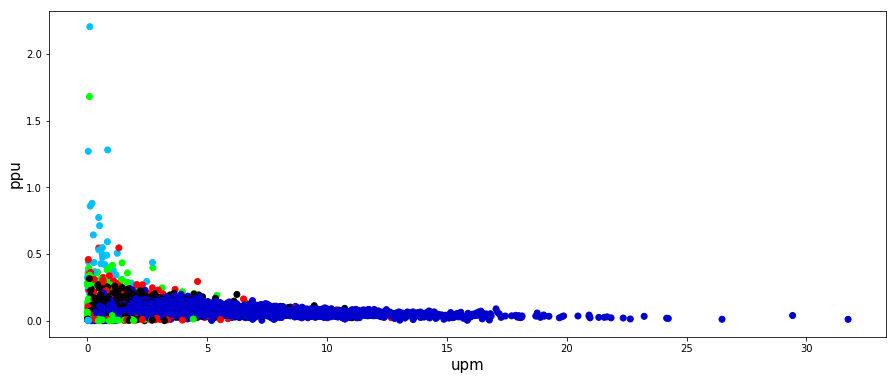

In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
aa=kmeans.fit(df3)
k_labels=pd.DataFrame(data=list(kmeans.labels_),index=df3.index)
df3['Clusters']=k_labels
df3.head()
k_labels=pd.DataFrame(data=kmeans.labels_)
fig, ax1=plt.subplots(1,1,sharey=True,figsize=(15,6))
#ax1.set_title('K Means',fontsize=18,color='green')
colors={0:'red', 1:'mediumblue', 2:'deepskyblue', 3:'lime', 4:'black', 5:'yellow'}
ax1.scatter(df3['upm'],df3['ppu'],c=df3['Clusters'].apply(lambda x: colors[x]))
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200 ,alpha=0.5)
plt.xlabel('upm',fontsize=15)
plt.ylabel('ppu',fontsize=15)

Text(0,0.5,'ppm')

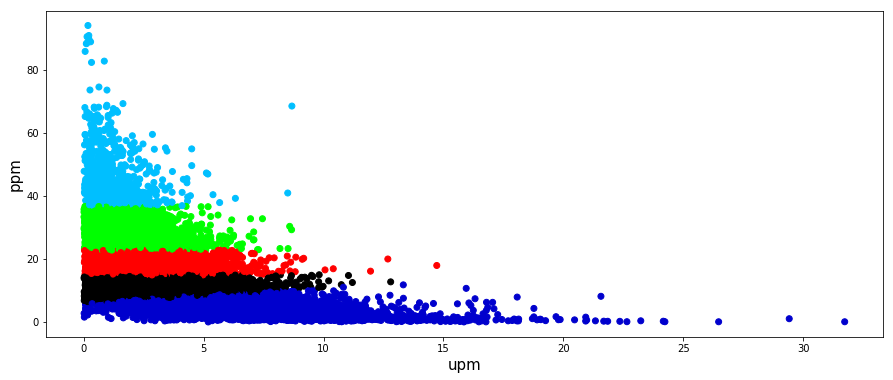

In [7]:
fig2, ax2=plt.subplots(1,1,sharey=True,figsize=(15,6))
#ax1.set_title('K Means',fontsize=18,color='green')
colors={0:'red', 1:'mediumblue', 2:'deepskyblue', 3:'lime', 4:'black', 5:'yellow'}
ax2.scatter(df3['upm'],df3['User.Thr. (Mbps)'],c=df3['Clusters'].apply(lambda x: colors[x]))
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200 ,alpha=0.5)
plt.xlabel('upm',fontsize=15)
plt.ylabel('ppm',fontsize=15)

In [9]:
from sklearn.metrics import silhouette_score


In [ ]:
for n in df3['Clusters']:
    Si=silhouette_score(df,df['Clusters'])
    print(Si)